In [19]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
#import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd


In [20]:
data = pd.read_csv("./diabetic_data.csv")

data.replace('?',np.nan,inplace=True)
data.shape

(101766, 50)

In [3]:
data["race_age_gender"] = data["race"].map(str) + data["gender"].map(str) + data["age"].map(str)
data["num_medications" + "_log"] = np.log(data["num_medications"])
data.shape

(101766, 52)

In [4]:
drop_Idx = set(data[(data['diag_1'] == '?') & (data['diag_2'] == '?') & (data['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(data['diag_1'][data['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(data['diag_2'][data['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(data['diag_3'][data['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(data['race'][data['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(data[data['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(data['gender'][data['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(data.index) - set(drop_Idx))
data = data.iloc[new_Idx]
data.shape

(96446, 52)

In [5]:
# re-encoding admission type, discharge type and admission source into fewer categories

data['admission_type_id'] = data['admission_type_id'].replace(2,1)
data['admission_type_id'] = data['admission_type_id'].replace(7,1)
data['admission_type_id'] = data['admission_type_id'].replace(6,5)
data['admission_type_id'] = data['admission_type_id'].replace(8,5)

data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(6,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(8,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(9,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(13,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(3,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(4,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(5,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(14,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(22,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(23,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(24,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(12,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(15,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(16,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(17,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(25,18)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(26,18)

data['admission_source_id'] = data['admission_source_id'].replace(2,1)
data['admission_source_id'] = data['admission_source_id'].replace(3,1)
data['admission_source_id'] = data['admission_source_id'].replace(5,4)
data['admission_source_id'] = data['admission_source_id'].replace(6,4)
data['admission_source_id'] = data['admission_source_id'].replace(10,4)
data['admission_source_id'] = data['admission_source_id'].replace(22,4)
data['admission_source_id'] = data['admission_source_id'].replace(25,4)
data['admission_source_id'] = data['admission_source_id'].replace(15,9)
data['admission_source_id'] = data['admission_source_id'].replace(17,9)
data['admission_source_id'] = data['admission_source_id'].replace(20,9)
data['admission_source_id'] = data['admission_source_id'].replace(21,9)
data['admission_source_id'] = data['admission_source_id'].replace(13,11)
data['admission_source_id'] = data['admission_source_id'].replace(14,11)

In [6]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 1)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -99)
data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', -99)

In [7]:
data['level1_diag1'] = data['diag_1']
data['level2_diag1'] = data['diag_1']
data['level1_diag2'] = data['diag_2']
data['level2_diag2'] = data['diag_2']
data['level1_diag3'] = data['diag_3']
data['level2_diag3'] = data['diag_3']

data.loc[data['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
data.loc[data['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
data.loc[data['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
data.loc[data['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
data.loc[data['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
data.loc[data['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
data['level1_diag1'] = data['level1_diag1'].replace('?', -1)
data['level2_diag1'] = data['level2_diag1'].replace('?', -1)
data['level1_diag2'] = data['level1_diag2'].replace('?', -1)
data['level2_diag2'] = data['level2_diag2'].replace('?', -1)
data['level1_diag3'] = data['level1_diag3'].replace('?', -1)
data['level2_diag3'] = data['level2_diag3'].replace('?', -1)

data['level1_diag1'] = data['level1_diag1'].astype(float)
data['level2_diag1'] = data['level2_diag1'].astype(float)
data['level1_diag2'] = data['level1_diag2'].astype(float)
data['level2_diag2'] = data['level2_diag2'].astype(float)
data['level1_diag3'] = data['level1_diag3'].astype(float)
data['level2_diag3'] = data['level2_diag3'].astype(float)



In [8]:
for index, row in data.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        data.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        data.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        data.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        data.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        data.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        data.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        data.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        data.loc[index, 'level1_diag1'] = 8
    else:
        data.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        data.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        data.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        data.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        data.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        data.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        data.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        data.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        data.loc[index, 'level1_diag2'] = 8
    else:
        data.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        data.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        data.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        data.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        data.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        data.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        data.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        data.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        data.loc[index, 'level1_diag3'] = 8
    else:
        data.loc[index, 'level1_diag3'] = 0

In [9]:
for index, row in data.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        data.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        data.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        data.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        data.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        data.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        data.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        data.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        data.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        data.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        data.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        data.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        data.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        data.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        data.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        data.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        data.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        data.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        data.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        data.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        data.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        data.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        data.loc[index, 'level2_diag1'] = 22
    else:
        data.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        data.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        data.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        data.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        data.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        data.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        data.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        data.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        data.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        data.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        data.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        data.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        data.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        data.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        data.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        data.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        data.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        data.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        data.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        data.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        data.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        data.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        data.loc[index, 'level2_diag2'] = 22
    else:
        data.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        data.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        data.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        data.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        data.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        data.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        data.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        data.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        data.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        data.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        data.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        data.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        data.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        data.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        data.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        data.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        data.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        data.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        data.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        data.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        data.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        data.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        data.loc[index, 'level2_diag3'] = 22
    else:
        data.loc[index, 'level2_diag3'] = 0

In [71]:
data.shape

(96446, 58)

In [53]:
from math import log10
class ExploratoryDataAnalysis:
    def __init__(self,data):
        self.data = data
    
    def get_feature_class_count(self,col):
        count_map = {}
        for x in col:
            if(x in count_map):
                count_map[x] = count_map[x] + 1
            else:
                count_map[x] = 1

        return log10(len(count_map))
    
    def get_missing_counts(self,col):
        return len(col) - col.count()
    
    def plot_class_counts(self,plot_missing_feature_count = False):
        class_counts = [self.get_feature_class_count(self.data[column]) for column in self.data]
        data = [go.Histogram(x=self.data.columns, y=class_counts)]
        trace = go.Bar(
            x=self.data.columns,
            y=class_counts
        )
        layout = go.Layout(
            title='Feature counts | Total number of rows=' + str(len(self.data)),
            xaxis = dict(title='Features'),
            yaxis = dict(title='Log(Number of unique values)')
        )
        py.iplot(go.Figure(data=[trace], layout=layout))
    
    def plot_class_count(self):
        count_NO = 0
        count_less_30 = 0
        for x in self.data["readmitted"]:
            if(x == "NO"):
                count_NO = count_NO + 1
            elif (x == "<30"):
                count_less_30 = count_less_30 + 1

        trace = go.Bar(
            x=[">30","<30","NO"],
            y=[(len(self.data) - count_NO  - count_less_30),count_less_30,count_NO]
        )
        layout = go.Layout(
            title='Class counts | Total number of rows=' + str(len(self.data)),
            xaxis = dict(title='Features'),
            yaxis = dict(title='Log(Number of unique values)')
        )
        py.iplot(go.Figure(data=[trace], layout=layout))
        
    def plot_missing_count(self):
        class_counts = [len(self.data[column]) for column in self.data]
        missing_counts = [self.get_missing_counts(self.data[column]) for column in self.data]
        data = [go.Histogram(x=self.data.columns, y=class_counts)]
        trace = go.Bar(
            x=self.data.columns,
            y=class_counts
        )
        trace_missing = go.Bar(
            x=self.data.columns,
            y=missing_counts
        )
        layout = go.Layout(
            title='Feature counts | Total number of rows=' + str(len(self.data)),
            xaxis = dict(title='Features'),
            yaxis = dict(title='Log(Number of unique values)')
        )
        py.iplot(go.Figure(data=[trace,trace_missing], layout=layout))
        

    

In [54]:
EDA = ExploratoryDataAnalysis(data)
EDA.plot_class_counts()
EDA.plot_class_count()
EDA.plot_missing_count()

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack,vstack

    
class OneHotEncoderWithFeaturePrunning:
    def __init__(self,threshold_count=500,dummy_variable="UNK"):
        self.enc = CountVectorizer(analyzer='char_wb',lowercase=False)
        self.frequency_map = {}
        self.threshold_count = threshold_count
        
        
    def fit(self,data):
        map(self._process_frequencies,enumerate(data))
        map(self._process_rare_data,enumerate(data))
        return self.enc.fit(data)
        
    def _process_frequencies(self,data,index):
        if(data[index] not in self.frequency_map):
            self.frequency_map[data[index]] = 1
        else:
            self.frequency_map[data[index]] = self.frequency_map[data[index]] + 1
            
    def _process_rare_data(self,data,index):
        if(self.frequency_map[data[index]] <= self.threshold_count):
            data[index] = self.dummy_variable
            
    def fit_transform(self,data):
        map(self._process_frequencies,enumerate(data))
        map(self._process_rare_data,enumerate(data))
        return self.enc.fit_transform(data)
    
    def transform(self,data):
        map(self._process_rare_data,enumerate(data))
        return self.enc.transform(data)
            
    def get_encoder(self):
        return self.enc
    
class FeatureEngineering:
    categorical_indices={
    "race":True,
    "gender": True,
    "age":True,
    "admission_type_id":True,
    "discharge_disposition_id":True,
    "admission_source_id": True,
    "time_in_hospital": False,
#             "medical_specialty":True,
    "num_lab_procedures":False,
    "num_procedures":False,
    "num_medications":False,
    "number_outpatient":True,
    "number_emergency":True,
    "number_inpatient":True,
    "diag_1":True,
    "diag_2":True,
    "diag_3":True,
    "number_diagnoses":False,
    "max_glu_serum":True,
    "A1Cresult":True,
    "metformin":True,
    "repaglinide":True,
    "nateglinide":True,
    "chlorpropamide":True,
    "glimepiride":True,
    "acetohexamide":True,
    "glipizide":True,
    "glyburide":True,
    "tolbutamide":True,
    "pioglitazone":True,
    "rosiglitazone":True,
    "acarbose":True,
    "miglitol":True,
    "troglitazone":True,
    "tolazamide":True,
#             "examide":True,
#             "citoglipton":True,
    "insulin":True,
    "glyburide-metformin":True,
    "glipizide-metformin":True,
    "metformin-rosiglitazone":True,
    "metformin-pioglitazone":True,
    "change":True,
    "diabetesMed":True,
#     "race_age_gender":True
#             "level2_diag3":True,
#             "level2_diag1":True,
#             "level2_diag2":True
}
    def get_encoding(self,column):
        categorical_encoder = OneHotEncoderWithFeaturePrunning()
        return categorical_encoder.fit_transform(column.astype('str')), categorical_encoder
    
    def pre_process_columns(self,df):
        df.admission_type_id = df.loc[:,['admission_type_id']].replace(2,1)
        df.admission_type_id = df.loc[:,['admission_type_id']].replace(7,1)
        df.admission_type_id = df.loc[:,['admission_type_id']].replace(6,5)
        df.admission_type_id = df.loc[:,['admission_type_id']].replace(8,5)

        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(6,1)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(8,1)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(9,1)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(13,1)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(3,2)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(4,2)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(5,2)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(14,2)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(22,2)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(23,2)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(24,2)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(12,10)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(15,10)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(16,10)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(17,10)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(25,18)
        df.discharge_disposition_id = df.loc[:,['discharge_disposition_id']].replace(26,18)

        df.admission_source_id = df.loc[:,['admission_source_id']].replace(2,1)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(3,1)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(5,4)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(6,4)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(10,4)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(22,4)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(25,4)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(15,9)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(17,9)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(20,9)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(21,9)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(13,11)
        df.admission_source_id = df.loc[:,['admission_source_id']].replace(14,11)
        return df
        
    
    def fit(self,data,y):

        x = None
#         data = self.pre_process_columns(data)
        self.encoder = {}
        for label, column in data.items():
            if(label in self.categorical_indices):
                if(self.categorical_indices[label] == True):
                    encoded_data,self.encoder[label] = self.get_encoding(column)
                    x = encoded_data if x == None else hstack([x,encoded_data],format="csr")
                else:
                    x = column if x == None else hstack([x,((pd.DataFrame(column.astype('float64'))).to_sparse())],format="csr")
        return x.toarray()
    
    def fit_transform(self,data,y):
        return self.fit(data,y)
    
    def transform(self,data):
        x = None
#         data = self.pre_process_columns(data)
        self.encoder = {}
        for label, column in data.items():
            if(label in self.categorical_indices):
                if(self.categorical_indices[label] == True):
                    encoded_data = (self.encoder[label]).transform(column.astype('str'))
                    x = encoded_data if x == None else hstack([x,encoded_data])
                else:
                    x = column if x == None else hstack([x,(pd.DataFrame(column).to_sparse())])
        return x.toarray()


In [22]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from inspect import signature
from sklearn.metrics import average_precision_score

def print_confusion_matrix(confusion_matrix, class_names, figsize = (6,2), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def print_prauc(y_test,y_score):
    average_precision = average_precision_score(y_test, y_score)

    print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
    plt.show()

    
def print_raoc(y_test,y_score):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def print_result(y_test1, y_pred1, y_pred_proba1=0):
    cm = confusion_matrix(y_test1, y_pred1, labels=[0,1])
    print_confusion_matrix(cm, [0, 1])
    print(classification_report(y_test1, y_pred1))
    
from sklearn.metrics import confusion_matrix, classification_report
def generate_results(clf,X_test,y_test):
    pred = clf.predict(X_test)
    print_result(y_test, pred)
    score = clf.decision_function(X_test)
    print_prauc(y_test, score)
    print_raoc(y_test, score)

In [12]:
# Drop rows with repeat hospitalisation. Our task here is 
# to predict if the patient is going to be rehospitalised
# for the first time
data = data.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
data.shape

(67580, 58)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
def split_data(x,label):
    X_train, X_test, y_train, y_test = train_test_split(x, label, test_size=0.20)
    return X_train, X_test, y_train, y_test

# y = (data["readmitted"].astype('str')).apply(lambda x: 0 if x == "NO" else (1 if x == "<30" else 2))
y = (data["readmitted"].astype('str')).apply(lambda x: 0 if x == "NO" else 1)
X_train, X_test, y_train, y_test = split_data(data,y) 
# pipeline = make_pipeline(FeatureEngineering(),AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=300))
lr=LogisticRegression()
pipeline = make_pipeline(FeatureEngineering(),lr)
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)
pipeline.score(X_test,y_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



KeyError: 'race'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version



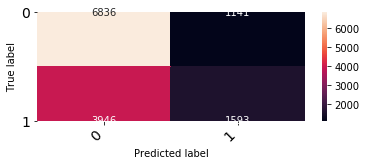

              precision    recall  f1-score   support

           0       0.63      0.86      0.73      7977
           1       0.58      0.29      0.39      5539

    accuracy                           0.62     13516
   macro avg       0.61      0.57      0.56     13516
weighted avg       0.61      0.62      0.59     13516



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version



Average precision-recall score: 0.55


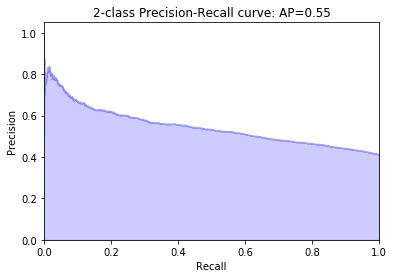

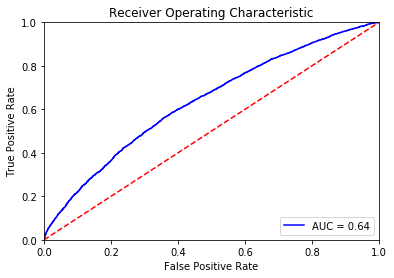

In [106]:
# pipeline.score(X_train,y_train)
generate_results(pipeline,X_test,y_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-

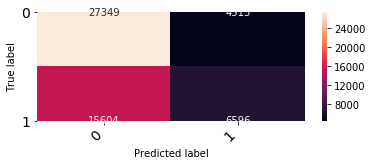

              precision    recall  f1-score   support

           0       0.64      0.86      0.73     31864
           1       0.59      0.30      0.40     22200

    accuracy                           0.63     54064
   macro avg       0.62      0.58      0.56     54064
weighted avg       0.62      0.63      0.59     54064



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version



Average precision-recall score: 0.55


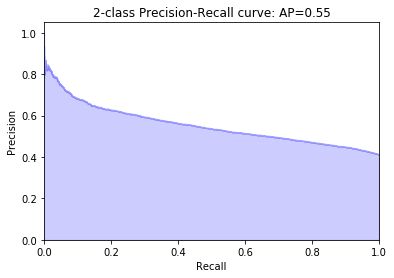

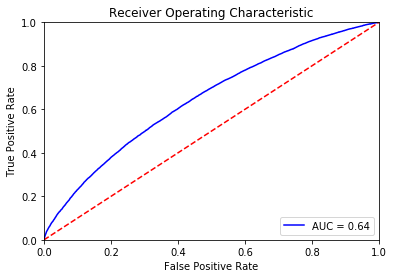

In [77]:
pipeline.score(X_train,y_train)
generate_results(pipeline,X_train,y_train)

In [78]:
pipeline.score(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version



0.6278669724770642

In [152]:
X_test

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
65586,182820870,99801477,AfricanAmerican,Female,[60-70),[50-75),1,1,7,3,...,No,No,No,No,No,No,No,No,No,<30
57310,163601088,81886662,Caucasian,Female,[50-60),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,No,NO
71924,209345604,9849366,Caucasian,Female,[50-60),NaN,6,1,17,2,...,No,No,No,No,No,No,No,No,Yes,NO
26569,87493866,2766645,Caucasian,Female,[70-80),NaN,2,3,4,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
85232,269857608,38357937,Caucasian,Female,[60-70),NaN,1,6,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20124,71161080,103011192,Caucasian,Female,[60-70),NaN,2,1,7,2,...,No,No,No,No,No,No,No,No,No,NO
96253,373074998,51273126,Caucasian,Male,[60-70),NaN,1,1,7,4,...,No,Steady,No,No,No,No,No,No,Yes,NO
85522,270908298,101021643,Caucasian,Female,[50-60),NaN,3,1,1,6,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
94669,350859194,115063191,NaN,Female,[80-90),NaN,1,6,7,7,...,No,No,No,No,No,No,No,No,Yes,NO


In [154]:
f=FeatureEngineering()
encoded_X_train=pd.DataFrame(f.fit_transform(X_train,y_train))
encoded_X_test=pd.DataFrame(f.transform(X_test))
print(encoded_X_train.shape,encoded_X_test.shape)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:146: FutureWarning:

DataFrame.to_sparse is deprecated and will be removed in a future version



KeyError: 'race'

In [136]:
print(encoded_X_train.shape,X_train.shape)
#encoded_X_train.columns.values

(81412, 445) (81412, 50)


In [141]:
#Lime
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(encoded_X_train.values,
feature_names=encoded_X_train.columns.values.tolist(),
class_names=y_train.unique(),
categorical_features=categorical_features,
verbose=True, mode='classification')
# exp.show_in_notebook(show_table=True)


In [149]:
exp = explainer.explain_instance(encoded_X_test.values[0],lr.predict_proba,num_features=encoded_X_train.shape[1])
exp.show_in_notebook(show_table=True)

IndexError: index 409 is out of bounds for axis 0 with size 409